In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("S02-hw-dataset.csv")

# Первичный осмотр
display(df.head())
df.info()
display(df.describe())

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("S02-hw-dataset.csv")

# 1. Доля пропусков по каждому столбцу
missing_share = df.isna().mean()
print("Доля пропусков по столбцам:")
display(missing_share)

# 2. Полностью дублирующиеся строки
duplicates = df[df.duplicated()]
print("Полностью дублирующиеся строки:")
display(duplicates)

# 3. «Подозрительные» значения:
#    возраст > 100 или < 0, отрицательные покупки/выручка
suspicious = df[
    (df["age"] > 100) | (df["age"] < 0) |
    (df["purchases"] < 0) |
    (df["revenue"] < 0)
]
print("Подозрительные строки:")
display(suspicious)

Доля пропусков по столбцам:


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Полностью дублирующиеся строки:


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


Подозрительные строки:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv("S02-hw-dataset.csv")

#Частоты стран
print("Частоты по странам:")
display(df["country"].value_counts())

#Группировка по стране: средний возраст, среднее число покупок, средняя выручка
group_stats = df.groupby("country")[["age", "purchases", "revenue"]].mean().round(2)
print("Средние значения по странам:")
display(group_stats)

#Возрастные группы
age_bins = [0, 18, 30, 45, 60, 120]
age_labels = ["0–17", "18–29", "30–44", "45–59", "60+"]

df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)
print("Частоты по возрастным группам:")
display(df["age_group"].value_counts())

Частоты по странам:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Средние значения по странам:


,age,purchases,revenue
country,,,
CN,24.00,4.50,1054.00
DE,34.60,6.50,1445.50
FR,46.25,4.25,675.92
RU,30.08,4.77,790.08
US,36.71,4.62,557.38


Частоты по возрастным группам:


age_group
18–29    14
30–44    13
45–59    10
0–17      1
60+       0
Name: count, dtype: int64

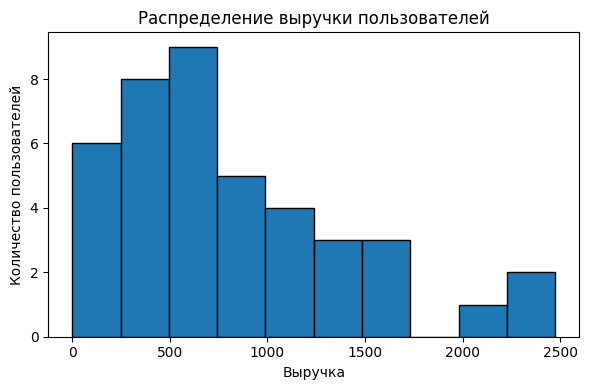

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("S02-hw-dataset.csv")

# 1. Гистограмма выручки
plt.figure(figsize=(6, 4))
plt.hist(df["revenue"].dropna(), bins=10, edgecolor="black")
plt.xlabel("Выручка")
plt.ylabel("Количество пользователей")
plt.title("Распределение выручки пользователей")
plt.tight_layout()
plt.savefig("figures/revenue_hist.png", dpi=150, bbox_inches="tight") 
plt.show()
plt.close()


На гистограмме показано распределение выручки по пользователям. Видно, в каких диапазонах выручка встречается чаще и есть ли значения, сильно отличающиеся от остальных. Это помогает понять, много ли пользователей с низкой или высокой выручкой.

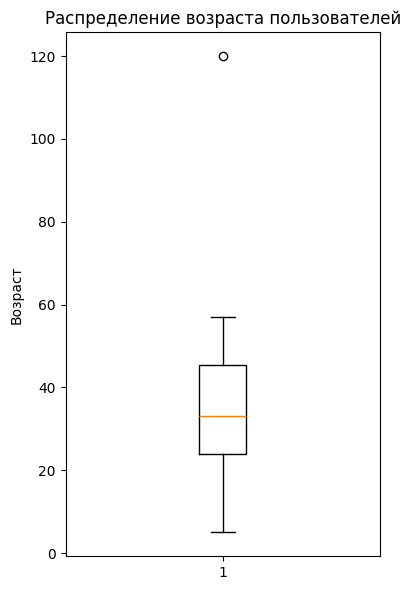

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("S02-hw-dataset.csv")

# 2. Boxplot возраста
plt.figure(figsize=(4, 6))
plt.boxplot(df["age"].dropna(), vert=True)
plt.ylabel("Возраст")
plt.title("Распределение возраста пользователей")
plt.tight_layout()
plt.show()


Boxplot показывает распределение возраста пользователей: медиану, «основной» диапазон и возможные выбросы. По этому графику можно увидеть, в каком возрастном интервале сосредоточено большинство пользователей и есть ли аномально маленькие или большие значения возраста.

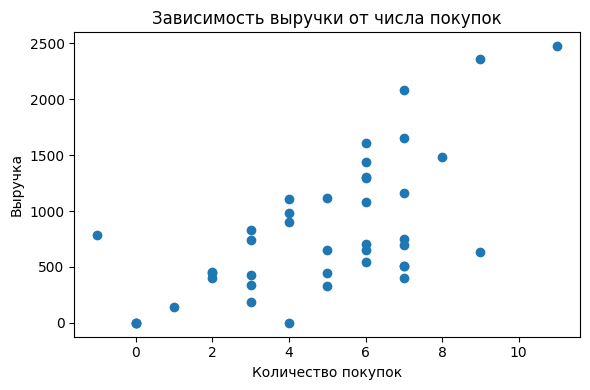

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("S02-hw-dataset.csv")

# 3. Scatter plot: покупки vs выручка
plt.figure(figsize=(6, 4))
plt.scatter(df["purchases"], df["revenue"])
plt.xlabel("Количество покупок")
plt.ylabel("Выручка")
plt.title("Зависимость выручки от числа покупок")
plt.tight_layout()
plt.show()


На диаграмме рассеяния видно, как связаны количество покупок и выручка пользователя. Точки группируются так, что при большем числе покупок, как правило, растёт и общая выручка, но возможны отдельные точки, которые выбиваются из общей тенденции.